## Ex. 2.1

Suppose each of $K$-classes has an associated target $t_k$, which is a vector of all zeros, except a one in the $k$th position. Show that classifying to the largest element of $\hat{y}$ amounts to choosing the closest target, $\min_k\|t_k-\hat{y}\|$, if the elements of $\hat{y}$ sum to one.

*Proof.*

Since 
$$
\|t_k-\hat{y}\|^2 = (1-\hat{y}_k)^2 + \sum_{i\neq k} \hat{y}_i^2
$$

Then, $k^*= \arg\min_k\|t_k-\hat{y}\|^2 = \arg\max_k \hat{y}_k$.

## Ex. 2.2 
Show how to compute the Bayes decision boundary for the simulation example in Figure 2.5.

*Proof.*

The optimal Bayes classifier can be written as 
$$
\hat{G}(x)=\mathcal{G}_k \text{ if } \Pr(\mathcal{G}_k|X=x)=\max_{g\in \mathcal{G}} \Pr(g|X=x).
$$

For this case, we have two classes: blue and orange
$$
\begin{aligned}
\Pr(blue|X=x) &\gtrless \Pr(orange|X=x)\\
\Pr(X=x|blue)\Pr(blue) &\gtrless \Pr(X=x|orange)\Pr(orange)\\
\Pr(X=x|blue) &\gtrless \Pr(X=x|orange)\\
\end{aligned}
$$

Suppose, in the first sampling, 10 means $p_k$ for blue points generated from $N([1,0]^T,\mathbf{I})$ and 10 means $q_k$ for orange points generated from $N([0,1]^T,\mathbf{I})$.

$$
\begin{aligned}
\sum_{k=1}^{10}\frac{1}{10}\exp(-\frac{5}{2\sigma^2}\|p_k-x\|^2) &\gtrless \sum_{k=1}^{10}\frac{1}{10}\exp(-\frac{5}{2\sigma^2}\|q_k-x\|^2)\\
\sum_{k=1}^{10}\exp(-\frac{5}{2\sigma^2}\|p_k-x\|^2) &\gtrless \sum_{k=1}^{10}\exp(-\frac{5}{2\sigma^2}\|q_k-x\|^2)
\end{aligned}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Generate data points

In [2]:
identity_two = np.identity(2)

blue_true = np.random.multivariate_normal([1,0], identity_two, 10)
orange_true = np.random.multivariate_normal([0,1], identity_two, 10)

blue = []
orange = []
for i in range(100):
    blue.append(np.random.multivariate_normal(blue_true[random.randint(0,9)], identity_two/5, 1))
    orange.append(np.random.multivariate_normal(orange_true[random.randint(0,9)], identity_two/5, 1))
blue = np.array(blue).squeeze()
orange = np.array(orange).squeeze()

### Plot

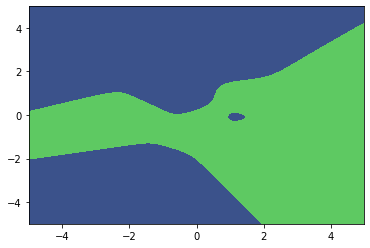

In [3]:
step = 0.01
x = np.arange(-5,5,step)
y = np.arange(-5,5,step)
X,Y = np.meshgrid(x,y)
Z = 0
for i in range(10):
    Z += np.exp(-5/2*((X-blue_true[i,0])**2+(Y-blue_true[i,1])**2))- np.exp(-5/2*((X-orange_true[i,0])**2+(Y-orange_true[i,1])**2))
plt.contourf(X,Y,Z, levels = 0)
plt.show()

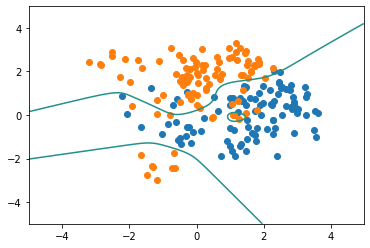

In [4]:
plt.contour(X,Y,Z, levels = 0)
plt.scatter(blue[:,0], blue[:, 1])
plt.scatter(orange[:,0], orange[:, 1])
plt.show()

## Ex. 2.3

Consider $N$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin. Suppose we consider a nearest-neighbor estimate at the origin. Show that the median distance from the orign to the closest data point is given by
$$  
d(p,N) = \bigg(1-\frac{1}{2}^{1/N}\bigg)^{1/p}
$$

*Proof.*

($\Pr(X<m)$ equals to the sphere volume with radius $m$ is divided by the volume with radius $1$.)

Let $X_i, i=1,..., N$ be the distance from the origin to the data point. Then, 1st order statistic $X_{(1)}$ is the minimum distance to origin. The median $m$ satisfies 

$$
\Pr(X_{(1)} \geq m) \geq \frac{1}{2} \text{ and } \Pr(X_{(1)} \leq m) \geq \frac{1}{2}
$$

Then, 
$$
\Pr(X_{(1)} \geq m) = (\Pr(X \geq m))^N =(1-\Pr(X < m))^N = (1-m^p)^N \geq \frac{1}{2}
$$
and,
$$
\Pr(X_{(1)} \leq m) = (1-\Pr(X_{(1)} > m)) = 1-(1-m^p)^N \geq \frac{1}{2}
$$
It means that 
$$
(1-m^p)^N = \frac{1}{2}
$$

Thus, 

$$
d(p, N) = m = \bigg(1-\frac{1}{2}^{1/N}\bigg)^{1/p}
$$



## Ex. 2.4 

The edge effect problem discussed on page 23 is not peculiar to uniform sampling from bounded domains. Consider inputs drawn from a spherical multinormal distribution $X \sim N (0, \mathbf{I}_p)$. The squared distance from any sample point to the origin has a $\mathcal{X}_p^2$ distribution with mean $p$. Consider a prediction point $x_0$ drawn from this distribution, and let $a =x_0 /\|x_0\|$ be an associated unit vector. Let $z_i = a^Tx_i$ be the projection of each of the training points on this direction.

Show that the $z_i$ are distributed $N (0, 1)$ with expected squared distance from the origin $1$, while the target point has expected squared distance $p$ from the origin.

Hence for $p = 10$, a randomly drawn test point is about 3.1 standard deviations from the origin, while all the training points are on average one standard deviation along direction $a$. So most prediction points see themselves as lying on the edge of the training set.

*Proof.* 

Since $x_i\sim N (0, \mathbf{I}_p)$ and $z_i$ is a linear combination of normal distribution, $$E(z_i) = E(a^Tx_i) = 0, \text{ and } Var(z_i) = Var(a^Tx_i) = \|a\|^2 = 1$$

Thus, $z_i\sim N(0,1)$ and $E(z_i^2) = 1$, while $E(\|x_i\|^2) = p.$

## Ex. 2.5

(a) Derive equation (2.27). The last line makes use of (3.8) through a conditioning argument.

(b) Derive equation (2.28), making use of the cyclic property of the trace operator \[$\text{trace}(AB) = \text{trace}(BA)$\], and its linearity (which allows us to interchange the order of trace and expectation).

*Proof.*

(a). 
$$
\begin{aligned}

\text{EPE}(x_0)
&= E_{y_0|x_0}(y_0-\hat{y}_0)^2\\
&=E_{y_0|x_0}\big(E_{\mathcal{T}}\big((y_0-\hat{y}_0)^2|y_0\big)\big) \\ 
&= E_{y_0|x_0}E_{\mathcal{T}}(y_0-\hat{y}_0)^2\\
&= E_{y_0|x_0}E_{\mathcal{T}}(y_0^2-2y_0\hat{y}_0 +\hat{y}_0^2)\\
&= E_{y_0|x_0}\big(y_0^2-2y_0E_{\mathcal{T}}(\hat{y}_0)+E_{\mathcal{T}}(\hat{y}_0^2)\big)\\
&= E_{y_0|x_0}\big(y_0^2-2y_0E_{\mathcal{T}}(\hat{y}_0)+E_{\mathcal{T}}(\hat{y}_0^2)-(E_{\mathcal{T}}\hat{y}_0)^2+ (E_{\mathcal{T}}\hat{y}_0)^2\big)\\
&= E_{y_0|x_0}(y_0^2)-2E_{y_0|x_0}y_0 E_{\mathcal{T}}(\hat{y}_0)+(E_{\mathcal{T}}\hat{y}_0)^2+Var_{\mathcal{T}}(\hat{y}_0)\\
&= Var(y_0|x_0) + Var_{\mathcal{T}}(\hat{y}_0)+ ( E_{\mathcal{T}}\hat{y}_0-E_{y_0|x_0}y_0)^2\\
&= \underline{Var(y_0|x_0)+Var_{\mathcal{T}}(\hat{y}_0) + Bias^2(\hat{y}_0)}\\
&= Var(y_0|x_0)+Var_{\mathcal{T}}\bigg(\sum_{i=1}^N \ell_i(x_0)\varepsilon_i\bigg) + Bias^2(\hat{y}_0)\\
& = Var(y_0|x_0)+Var_{\mathcal{T}}(\varepsilon^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x_0) + Bias^2(\hat{y}_0)\\
&=\sigma^2 + E_{\mathcal{T}}x_0^T(\mathbf{X}^T\mathbf{X})^{-1}x_0\sigma^2 - (E_{\mathcal{T}}(\varepsilon^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x_0))^2+0^2\\
&=\sigma^2 + E_{\mathcal{T}}x_0^T(\mathbf{X}^T\mathbf{X})^{-1}x_0\sigma^2+0^2.
\end{aligned}
$$
(b). The variance depends on $x_0$. If $N$ is large and $\mathcal{T}$ were selected at random, and assuming $E(X)=0$ (**Standardlization**), then $\mathbf{X}^T\mathbf{X}\to NCov(X)$ and 
$$
\begin{aligned}
E_{x_0}\text{EPE}(x_0) &\sim E_{x_0}x_0^TCov(X)^{-1}x_0\sigma^2/N+\sigma^2\\
&= \text{trace}(E_{x_0}x_0x_0^TCov(X)^{-1})\sigma^2/N+\sigma^2\\ 
&= E_{x_0}x_0^TCov(X)^{-1}x_0\sigma^2/N+\sigma^2\\
&= \text{trace}[Cov(X)^{-1}Cov(x_0)]\sigma^2/N+\sigma^2\\
&=\sigma^2(p/N)+\sigma^2.
\end{aligned}
$$


## Ex. 2.6

Consider a regression problem with inputs $x_i$ and outputs $y_i$, and a parameterized model $f_{\theta}(x)$ to be fit by least squares. Show that if there are observations with tied or identical values of $x$, then the fit can be obtained from a reduced weighted least squares problem.

Suppose $x_1=x_2$, then 
$$
\begin{aligned}
\text{RSS}(\beta) &= \sum_{i=1}^N(y_i-x_i^T\beta)^2\\
&= \sum_{i=2}^Nw_i(y_i-x_i^T\beta)^2,
\end{aligned}
$$
where $w_i = 1$ if $i >=2$, and $w_1=2$.






## Ex. 2.7
Suppose we have a sample of $N$ pairs $x_i,y_i$ drawn i.i.d. from the distribution characterized as follows:
$$
\begin{aligned}
&x_i\sim h(x)\text{ the  design density}\\
&y_i=f(x_i)+\varepsilon_i,\text{$f$ is the regression function}\\
&\varepsilon_i\sim (0, \sigma^2), \quad\text{mean zero, variance $\sigma^2$}
\end{aligned}
$$
We construct an estimator for $f$ linear in the $y_i$,
$$
\hat{f}(x_0) = \sum_{i=1}^N \ell_i(x_0;\mathcal{X})y_i,
$$
where the weights $\ell_i(x_0;\mathcal{X})$ do not depend on the $y_i$, but do depend on the entire training sequence of $x_i$, denoted here by $\mathcal{X}$.

(a) Show that linear regression and $k$-nearest-neighbor regression are members of this class of estimators. Describe explicitly the weights $\ell_i(x_0;\mathcal{X})$ in each of these cases.

(b) Decompose the conditional mean-squared error
$$
E_{\mathcal{Y}|\mathcal{X}}(f(x_0)-\hat{f}(x_0))^2
$$
into a conditional squared bias and a conditional variance component. Like $\mathcal{X, Y}$ represents the entire training sequence of $y_i$.

(c) Decompose the (unconditional) mean-squared error
$$
E_{\mathcal{Y},\mathcal{X}}(f(x_0)-\hat{f}(x_0))^2
$$
into a squared bias and a variance component.

(d) Establish a relationship between the squared biases and variances in the above two cases.

(a). The least squared solution is 
$$\hat{f}(x_0) = x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^{T}y= \sum_{i=1}^N \ell_i(x_0; \mathcal{X})y_i,$$

where $\ell_i(x_0; \mathcal{X})$ is the $i$th-element of $x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^{T}$.

Let $N_k(x)$ be the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample. $k$-nearest neighbor predictor can be writtern
$$
\hat{f}(x_0) = \frac{1}{k} \sum_{x_i\in N_k(x)} y_i = \sum_{i=1}^N \frac{1}{k}\mathbb{I}_{\{x_i\in N_k(x_0)\}}y_i.
$$

(b). 
$$
\begin{aligned}
E_{\mathcal{Y}|\mathcal{X}}(f(x_0)-\hat{f}(x_0))^2 =&f^2(x_0)-2f(x_0)E_{\mathcal{Y}|\mathcal{X}}(\hat{f}(x_0))+ E_{\mathcal{Y}|\mathcal{X}}(\hat{f}^2(x_0)) \\
=& f^2(x_0)-2f(x_0)E_{\mathcal{Y}|\mathcal{X}}(\hat{f}(x_0)) + [E_{\mathcal{Y}|\mathcal{X}}(\hat{f}(x_0))]^2 + E_{\mathcal{Y}|\mathcal{X}}(\hat{f}^2(x_0)) -[E_{\mathcal{Y}|\mathcal{X}}(\hat{f}(x_0))]^2\\
=&(f(x_0)-E_{\mathcal{Y}|\mathcal{X}}\hat{f}(x_0))^2 + Var_{\mathcal{Y}|\mathcal{X}}(\hat{f}(x_0)) \\
=& \text{Bias}^2_{\mathcal{Y}|\mathcal{X}}（\hat{f}(x_0)）+ Var_{\mathcal{Y}|\mathcal{X}}(\hat{f}(x_0))
\end{aligned}
$$

(c). 
$$
\begin{aligned}
E_{\mathcal{Y},\mathcal{X}}(f(x_0)-\hat{f}(x_0))^2 =&f^2(x_0)-2f(x_0)E_{\mathcal{Y},\mathcal{X}}(\hat{f}(x_0))+ E_{\mathcal{Y},\mathcal{X}}(\hat{f}^2(x_0)) \\
=& f^2(x_0)-2f(x_0)E_{\mathcal{Y},\mathcal{X}}(\hat{f}(x_0)) + [E_{\mathcal{Y},\mathcal{X}}(\hat{f}(x_0))]^2 + E_{\mathcal{Y},\mathcal{X}}(\hat{f}^2(x_0)) -[E_{\mathcal{Y},\mathcal{X}}(\hat{f}(x_0))]^2\\
=&(f(x_0)-E_{\mathcal{Y},\mathcal{X}}\hat{f}(x_0))^2 + Var_{\mathcal{Y},\mathcal{X}}(\hat{f}(x_0)) \\
=& \text{Bias}^2_{\mathcal{Y},\mathcal{X}}（\hat{f}(x_0)）+ Var_{\mathcal{Y},\mathcal{X}}(\hat{f}(x_0))
\end{aligned}
$$

(d).

$$E_{\mathcal{Y},\mathcal{X}}(f(x_0)-\hat{f}(x_0))^2 = E_{\mathcal{X}}(E_{\mathcal{Y}|\mathcal{X}}(f(x_0)-\hat{f}(x_0))^2)$$

## Ex. 2.8
Compare the classification performance of linear regression and $k$–nearest neighbor classification on the *zipcode* data. In particular, consider only the 2’s and 3’s, and $k = 1, 3, 5, 7$ and $15$. Show both the training and test error for each choice. The zipcode data are available from the book website *www-stat.stanford.edu/ElemStatLearn*.

## Ex. 2.9
Consider a linear regression model with $p$ parameters, fit by least squares to a set of training data $(x_1,y_1),..., (x_N, y_N)$ drawn at random from a population. Let $\hat{\beta}$ be the least squares estimate. Suppose we have some test data $(\tilde{x}_1,\tilde{y}_1), ..., (\tilde{x}_M,\tilde{y}_M)$ drawn at random from the same population as the training data. If $R_{tr}(\beta) = \frac{1}{N}\sum_{1}^N(y_i-\beta^Tx_i)^2$ and $R_{te}(\beta) = \frac{1}{M}\sum_{1}^M(\tilde{y}_i-\beta^T\tilde{x}_i)^2$, prove that 
$$
E[R_{tr}(\hat{\beta})] \leq E[R_{te}(\hat{\beta})],
$$
where the expectations are over all that is random in each expression.

*Proof.*
Let $\tilde{\beta}$ be the least squares estimate for test set.

$$
\begin{aligned}
E[R_{tr}(\beta)] &= E[\frac{1}{N}\sum_{i=1}^N(y_i-\hat{\beta}^Tx_i)^2] \\
& =  E[\frac{1}{M}\sum_{i=1}^M(\tilde{y}_i-\tilde{\beta}^T\tilde{x}_i)^2] \\
&\leq E[\frac{1}{M}\sum_{i=1}^M(\tilde{y}_i-\hat{\beta}^T\tilde{x}_i)^2] \\
& = E[R_{te}(\hat{\beta})].
\end{aligned} 
$$

